Nhập dữ liệu vào

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/NgocNam1512/VTI_Internship/master/Week_2/datasets.csv")
data.head(100)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014-05-05 00:00:00,541125.0,5.0,2.75,2740,8426,1.0,0,0,4,1370,1370,1960,2001,5211 116th Pl SE,Bellevue,WA 98006,USA
96,2014-05-05 00:00:00,670000.0,3.0,2.50,1680,2000,3.0,0,0,3,1680,0,1909,1998,3503 NE 44th St,Seattle,WA 98105,USA
97,2014-05-05 00:00:00,384900.0,5.0,2.50,3090,12750,1.0,0,0,3,1750,1340,1968,1997,114 SW 292nd St,Federal Way,WA 98023,USA
98,2014-05-05 00:00:00,406100.0,3.0,2.25,1410,1332,3.0,0,0,3,1410,0,2005,0,8536 Interlake Ave N,Seattle,WA 98103,USA


Kiểm tra thông tin dữ liệu

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Xem thông tin về giá.

In [4]:
data.price.describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

Giá trị min là 0 => Nhiễu
<br>
Xóa các giá trị min này và kiểm tra lại lần nữa.

In [5]:
# Removing 0 price
data = data.drop(data[(data['price']==0)].index).reset_index(drop=True)
data.price.describe()

count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

Giờ bắt đầu quan sát các dữ liệu có liên quan đến giá như thế nào để quyết định lựa chọn các đặc tính (feature)

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


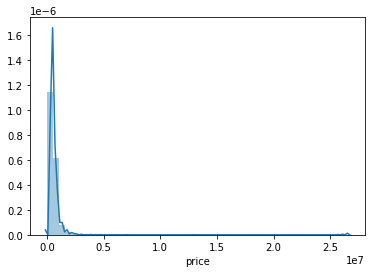

In [7]:
sns.distplot(data.price)

Phân loại các đặc tính số và text.

In [8]:
data.select_dtypes(include=["object"]).columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [9]:
data.select_dtypes(include=['int64', 'float64']).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

Xây dụng biểu đồ các có các hệ số liên quan giữa các đặc tính

In [10]:
corrmat = data.corr()
corrmat.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


In [11]:
# corr_data = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']]
# corr_data.head()

Xây dựng biểu đồ phân bố của số phòng ngủ với giá cả

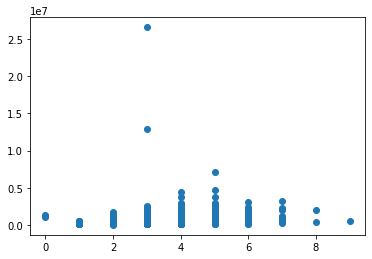

In [12]:
plt.scatter(data.bedrooms, data.price)

Nhận thấy có 2 điểm giá rất cao so với mặt bằng chung, loại bỏ 2 điểm này

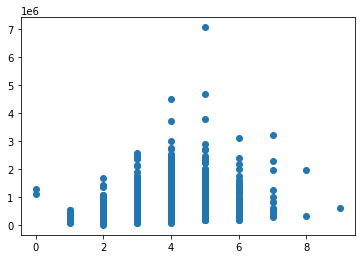

In [13]:
data = data.drop(data[(data.price>10000000)].index).reset_index(drop=True)
plt.scatter(data.bedrooms, data.price)

Biểu đồ về số phòng tắm với giá

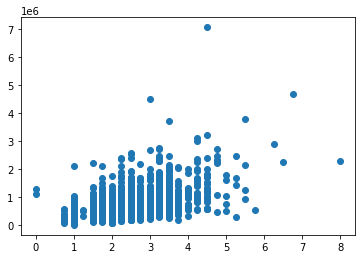

In [14]:
plt.scatter(data.bathrooms, data.price)

Vẫn còn một điểm giá khá cao, loại bỏ điểm này

In [15]:
data = data.drop(data[(data.price>6000000)].index).reset_index(drop=True)

Biểu đồ phân bố và linear giữa giá và diện tích(?)

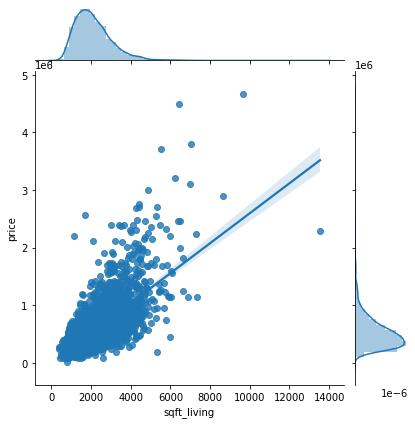

In [16]:
sns.jointplot(x=data.sqft_living, y=data.price, kind='reg')

Biểu đồ về giá cả và số tầng

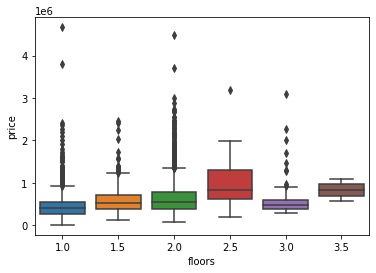

In [17]:
sns.boxplot(x=data.floors, y=data.price)

In [18]:
# data = data.drop(data[data.floors>=3.0].index).reset_index(drop=True)
# sns.boxplot(x=data.floors, y=data.price)

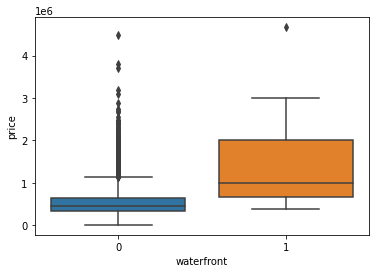

In [19]:
sns.boxplot(x=data.waterfront, y=data.price)

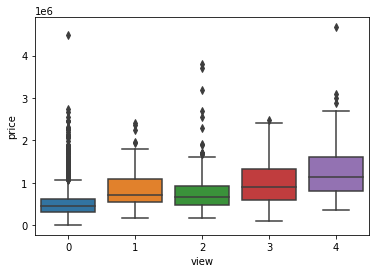

In [20]:
sns.boxplot(x=data.view, y=data.price)

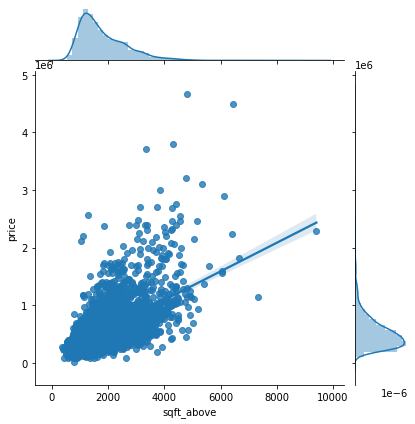

In [21]:
sns.jointplot(x=data.sqft_above, y=data.price, kind='reg')

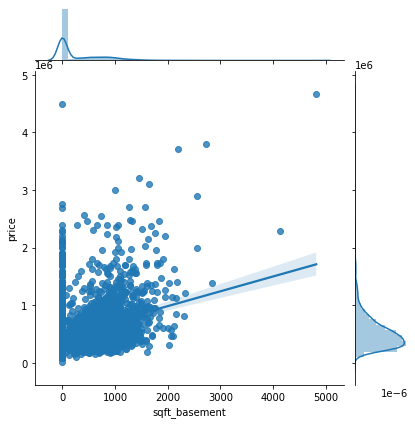

In [22]:
sns.jointplot(x=data.sqft_basement, y=data.price, kind='reg')

Có rất nhiều giá trị 0 trong cột diện tích hầm này nên sẽ bỏ feature này đi.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [24]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_above']]
y = data[['price']]

In [25]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

In [26]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pre = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pre)
print("Mean Absolute Error: {:,.2f}".format(rf_mae))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 168,008.45


In [27]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pre_dt = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pre_dt)
print("Decision Tree Mean Absolute Error: {:,.2f}".format(dt_mae))

Decision Tree Mean Absolute Error: 215,339.34


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pre_lr = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pre_lr)
print("Linear Regression MAE: {:,.2f}".format(lr_mae))

Linear Regression MAE: 163,413.70


In [29]:
keras_data = data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'price']]
data_arr = keras_data.values
data_arr

array([[3.00000000e+00, 1.50000000e+00, 1.34000000e+03, ...,
        1.34000000e+03, 0.00000000e+00, 3.13000000e+05],
       [5.00000000e+00, 2.50000000e+00, 3.65000000e+03, ...,
        3.37000000e+03, 2.80000000e+02, 2.38400000e+06],
       [3.00000000e+00, 2.00000000e+00, 1.93000000e+03, ...,
        1.93000000e+03, 0.00000000e+00, 3.42000000e+05],
       ...,
       [3.00000000e+00, 2.50000000e+00, 3.01000000e+03, ...,
        3.01000000e+03, 0.00000000e+00, 4.16904167e+05],
       [4.00000000e+00, 2.00000000e+00, 2.09000000e+03, ...,
        1.07000000e+03, 1.02000000e+03, 2.03400000e+05],
       [3.00000000e+00, 2.50000000e+00, 1.49000000e+03, ...,
        1.49000000e+03, 0.00000000e+00, 2.20600000e+05]])

In [30]:
X = data_arr[:,0:8]
y = data_arr[:,8]
y

array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [31]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [32]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

model = Sequential([
    Dense(100, activation='relu', input_shape=(8,)),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1, activation='relu'),
])

model.compile(optimizer='sgd', #stochastic gradient descent
              loss=keras.losses.MeanAbsoluteError(), 
              metrics=[keras.metrics.MeanAbsoluteError()])

hist = model.fit(X_train, y_train,
                 batch_size=10, epochs=200,
                 validation_data=(X_val, y_val))

Train on 3183 samples, validate on 682 samples
Epoch 1/200
3183/3183 [==============================] - 1s 201us/step - loss: 568995.0261 - mean_absolute_error: 564103.5000 - val_loss: 563739.1335 - val_mean_absolute_error: 568614.0000
Epoch 2/200
3183/3183 [==============================] - 0s 119us/step - loss: 543501.0353 - mean_absolute_error: 560787.7500 - val_loss: 563739.1335 - val_mean_absolute_error: 557348.4375
Epoch 3/200
3183/3183 [==============================] - 0s 121us/step - loss: 543501.0353 - mean_absolute_error: 555565.1250 - val_loss: 563739.1335 - val_mean_absolute_error: 553822.5000
Epoch 4/200
3183/3183 [==============================] - 0s 121us/step - loss: 543501.0352 - mean_absolute_error: 552703.7500 - val_loss: 563739.1335 - val_mean_absolute_error: 552098.1875
Epoch 5/200
3183/3183 [==============================] - 0s 118us/step - loss: 543501.0349 - mean_absolute_error: 551833.9375 - val_loss: 563739.1335 - val_mean_absolute_error: 551075.3750
Epoch 6/

In [34]:
model.evaluate(X_test, y_test)

683/683 [==============================] - 0s 30us/step


[553505.6556551977, 547171.9375]

In [41]:
from keras.layers.normalization import BatchNormalization

model2 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='relu'),
])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mse', 
              metrics=['mae'])

hist2 = model2.fit(X_train, y_train,
                 batch_size=10, epochs=100,
                 shuffle=True,
                 validation_data=(X_val, y_val))

Train on 3183 samples, validate on 682 samples
Epoch 1/100
3183/3183 [==============================] - 1s 222us/step - loss: 414552392578.2118 - mae: 543250.1875 - val_loss: 492833187821.9824 - val_mae: 562944.8750
Epoch 2/100
3183/3183 [==============================] - 0s 151us/step - loss: 412215980257.1964 - mae: 541614.8125 - val_loss: 488746390260.7390 - val_mae: 560231.1875
Epoch 3/100
3183/3183 [==============================] - 1s 160us/step - loss: 407570837549.0392 - mae: 538445.5000 - val_loss: 482867710870.8973 - val_mae: 557203.0625
Epoch 4/100
3183/3183 [==============================] - 0s 155us/step - loss: 401033352353.1763 - mae: 533769.6250 - val_loss: 474361745263.8592 - val_mae: 551754.7500
Epoch 5/100
3183/3183 [==============================] - 1s 159us/step - loss: 392864735736.4398 - mae: 527806.0000 - val_loss: 463974430762.0411 - val_mae: 545120.1250
Epoch 6/100
3183/3183 [==============================] - 0s 157us/step - loss: 383357894192.7390 - mae: 5208

Dựa vào dữ liệu train, ta nhận thấy:
Tại epoch khoảng 42 giá trị hàm loss có lẽ đã đạt global minimum nhưng vì learning rate quá lớn dẫn đến việc hàm vượt qua giá trị tại đây và đạt một local minium khác có giá trị lớn hơn global minium này.

Thử tạo một model khác với learning_rate nhỏ hơn.

In [45]:
model3 = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='relu'),
])

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mse', 
              metrics=['mae'])

hist3 = model3.fit(X_train, y_train,
                 batch_size=10, epochs=100,
                 shuffle=True,
                 validation_data=(X_val, y_val))

Train on 3183 samples, validate on 682 samples
Epoch 1/100
3183/3183 [==============================] - 1s 233us/step - loss: 414554415302.1728 - mae: 543256.9375 - val_loss: 492875436788.7390 - val_mae: 562965.9375
Epoch 2/100
3183/3183 [==============================] - 1s 163us/step - loss: 412232294356.2476 - mae: 541677.1250 - val_loss: 487728427152.1408 - val_mae: 559743.3750
Epoch 3/100
3183/3183 [==============================] - 1s 164us/step - loss: 407646994483.4734 - mae: 538535.6250 - val_loss: 480577936110.7332 - val_mae: 555486.5625
Epoch 4/100
3183/3183 [==============================] - 1s 159us/step - loss: 401156772778.1036 - mae: 534015.3750 - val_loss: 471242737357.7009 - val_mae: 549543.3125
Epoch 5/100
3183/3183 [==============================] - 1s 162us/step - loss: 393169038169.6764 - mae: 528271.0000 - val_loss: 464598718217.7595 - val_mae: 546128.0625
Epoch 6/100
3183/3183 [==============================] - 1s 158us/step - loss: 383609443592.1231 - mae: 5215

Tỉ lệ hội tụ chậm hơn nhưng kết quả thu được khá tốt. Có thể tăng thêm số epoch để thu đươc kết quả tối ưu hơn nữa.

In [47]:
model3.evaluate(X_test, y_test)

683/683 [==============================] - 0s 35us/step


[60151976151.894585, 164405.40625]